In [5]:
# Step 1: Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\CreditCardFault\\archive.zip")

# Step 3: Basic info
print("Shape of dataset:", df.shape)
df.head()



Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


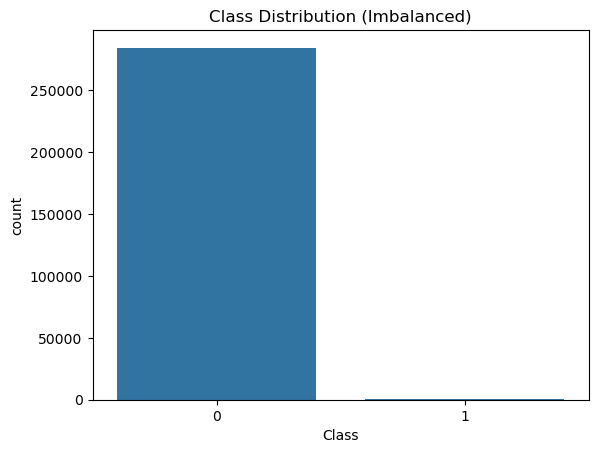

In [7]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution (0 = legit, 1 = fraud)
print(df['Class'].value_counts())

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Imbalanced)")
plt.show()


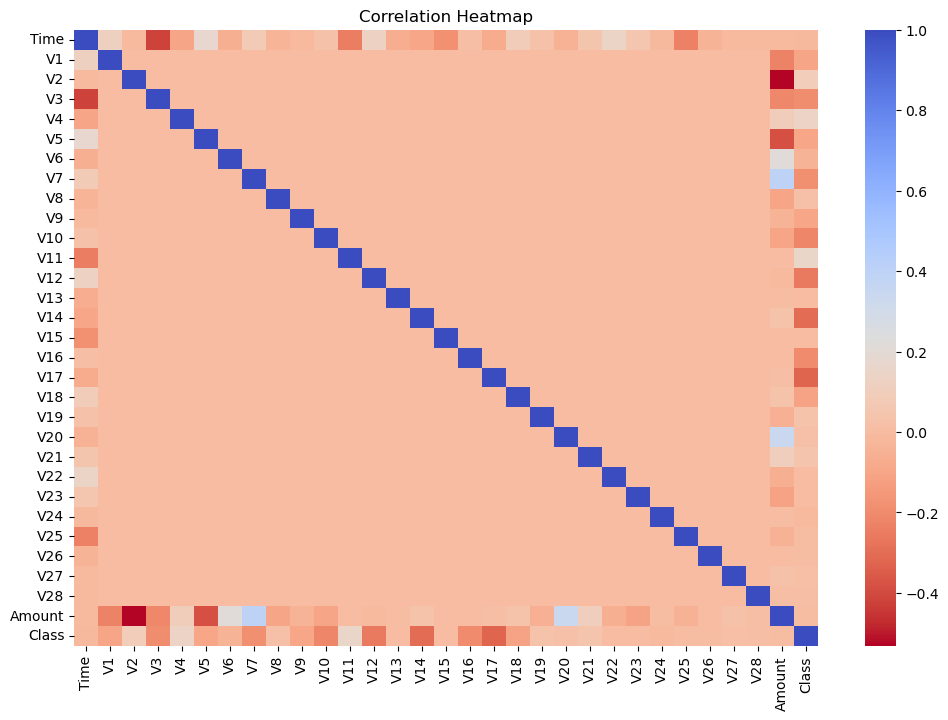

Top correlated features with Class:
 Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


In [9]:
# Step 5: Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Optional: Top correlated features with Class
corr_target = corr["Class"].abs().sort_values(ascending=False)
print("Top correlated features with Class:\n", corr_target.head(10))


In [19]:
print(df.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Scaled', 'Time_Scaled'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler

# Check if 'Amount' and 'Time' exist
if 'Amount' in df.columns and 'Time' in df.columns:
    scaler = StandardScaler()
    df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
    df['Time_Scaled'] = scaler.fit_transform(df[['Time']])
    df.drop(['Time', 'Amount'], axis=1, inplace=True)
else:
    print("Check column names: 'Amount' or 'Time' not found.")


Check column names: 'Amount' or 'Time' not found.


In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (199364, 30)
Test set shape: (85443, 30)


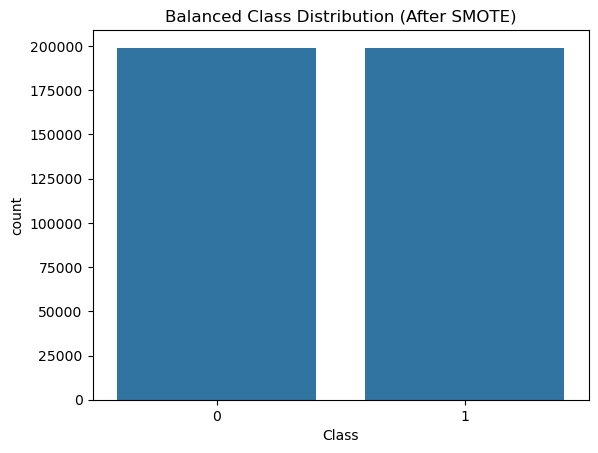

In [25]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check new class distribution
sns.countplot(x=y_train_resampled)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.show()


In [30]:
!pip install xgboost


In [32]:
from xgboost import XGBClassifier


Training Logistic Regression...
Training Random Forest...
Training XGBoost...

==== Logistic Regression Evaluation ====
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion Matrix:
 [[83376  1919]
 [   18   130]]
ROC-AUC Score: 0.9659891030018235


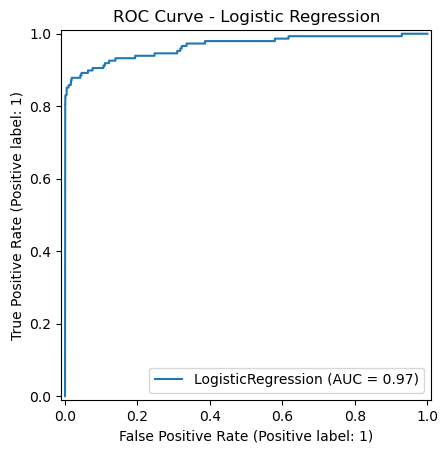


==== Random Forest Evaluation ====
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.78      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85275    20]
 [   33   115]]
ROC-AUC Score: 0.9485292300331283


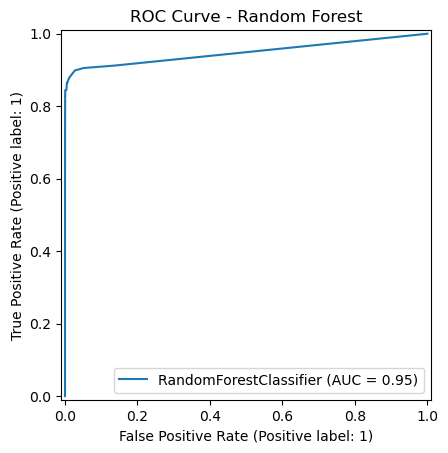


==== XGBoost Evaluation ====
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.76      0.80      0.78       148

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85257    38]
 [   29   119]]
ROC-AUC Score: 0.9708235963262636


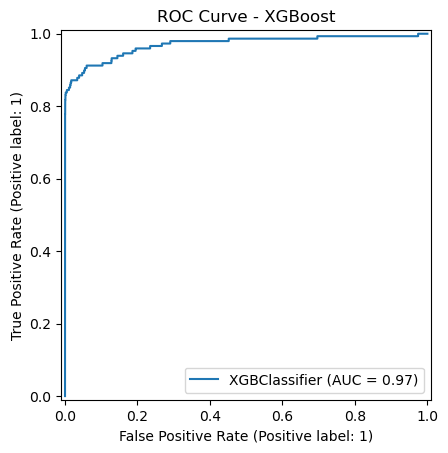

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
print("Training Logistic Regression...")
log_reg.fit(X_train_resampled, y_train_resampled)

print("Training Random Forest...")
rf.fit(X_train_resampled, y_train_resampled)

print("Training XGBoost...")
xgb.fit(X_train_resampled, y_train_resampled)

# Predict
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    print(f"\n==== {name} Evaluation ====")
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()


In [15]:
# 📦 Import essential libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import os

# 📂 Step 1: Load the dataset
file_path = r"C:\\Users\\HP\\OneDrive\\Desktop\\CreditCardFault\\creditcard.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
    
    # 🕒 Step 2: Extract hour of transaction
    df['Transaction_Hour'] = (df['Time'] // 3600) % 24

    # 🌙 Step 3: Flag for night-time transactions (12 AM to 6 AM)
    df['Is_Night_Transaction'] = df['Transaction_Hour'].apply(lambda x: 1 if x <= 6 else 0)

    # 📏 Step 4: Standardize 'Amount' and 'Time'
    scaler = StandardScaler()
    df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
    df['Time_Scaled'] = scaler.fit_transform(df[['Time']])

    # 🧹 Step 5: Drop original columns
    df.drop(['Time', 'Amount'], axis=1, inplace=True)

    # ✅ Step 6: Copy for feature engineering
    df_final = df.copy()

    # 🧠 Step 7: Feature Engineering
    np.random.seed(42)
    df_final['User_ID'] = np.random.randint(1, 101, size=len(df_final))  # simulate 100 users

    # Create timestamps based on scaled time (for synthetic ordering)
    df_final['Transaction_Timestamp'] = pd.to_datetime(df_final['Time_Scaled'], unit='s', origin='unix')
    df_final.sort_values(['User_ID', 'Transaction_Timestamp'], inplace=True)

    # 🧮 Transaction frequency per user (simplified approach)
    df_final['Transaction_Frequency'] = df_final.groupby('User_ID')['User_ID'].transform('count')

    # ⏱️ Active hours (time range of activity per user)
    df_final['Active_Hours'] = (
        df_final.groupby('User_ID')['Transaction_Timestamp']
        .transform(lambda x: (x.max() - x.min()).total_seconds() / 3600 + 1)
    )

    # 💰 Total and average amount per hour
    df_final['Total_Amount'] = df_final.groupby('User_ID')['Amount_Scaled'].transform('sum')
    df_final['Avg_Amount_Per_Hour'] = df_final['Total_Amount'] / df_final['Active_Hours']

    # 🧹 Clean up intermediate columns
    df_final.drop(columns=['Total_Amount', 'Active_Hours', 'Transaction_Timestamp'], inplace=True)

    # 🔍 Preview engineered features
    print(df_final[['Transaction_Hour', 'Is_Night_Transaction', 'Transaction_Frequency', 'Avg_Amount_Per_Hour']].head())

else:
    print("❌ File not found. Please check the file path and make sure 'creditcard.csv' exists.")


 







✅ File loaded successfully!
     Transaction_Hour  Is_Night_Transaction  Transaction_Frequency  \
112               0.0                     1                   2801   
146               0.0                     1                   2801   
192               0.0                     1                   2801   
230               0.0                     1                   2801   
274               0.0                     1                   2801   

     Avg_Amount_Per_Hour  
112           -72.599091  
146           -72.599091  
192           -72.599091  
230           -72.599091  
274           -72.599091  


In [17]:
from sklearn.model_selection import train_test_split

# 🎯 Define features (X) and target (y)
X = df_final.drop('Class', axis=1)  # 'Class' is the fraud label
y = df_final['Class']

# ✂️ Split into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data split into training and test sets.")


✅ Data split into training and test sets.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 🌳 Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🧪 Make predictions
y_pred = rf.predict(X_test)

# 📊 Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56863     1]
 [   16    82]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.84      0.91        98

    accuracy                           1.00     56962
   macro avg       0.99      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on the training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("✅ After SMOTE, counts of label '1': {}".format(sum(y_train_sm == 1)))
print("✅ After SMOTE, counts of label '0': {}".format(sum(y_train_sm == 0)))

# Retrain the model on the resampled data
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Evaluate the model on the test set
y_pred_sm = rf_sm.predict(X_test)

# Output evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix (after SMOTE):\n", confusion_matrix(y_test, y_pred_sm))
print("\nClassification Report (after SMOTE):\n", classification_report(y_test, y_pred_sm))


✅ After SMOTE, counts of label '1': 227451
✅ After SMOTE, counts of label '0': 227451
Confusion Matrix (after SMOTE):
 [[56856     8]
 [    7    91]]

Classification Report (after SMOTE):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.93      0.92        98

    accuracy                           1.00     56962
   macro avg       0.96      0.96      0.96     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
# Using class weights with Random Forest
rf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = rf_weighted.predict(X_test)

# Evaluate the model
print("Confusion Matrix (with class weights):\n", confusion_matrix(y_test, y_pred_weighted))
print("\nClassification Report (with class weights):\n", classification_report(y_test, y_pred_weighted))


Confusion Matrix (with class weights):
 [[56861     3]
 [   15    83]]

Classification Report (with class weights):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\CreditCardFault\\creditcard.csv")  # Update the path to your actual dataset

# Check the first few rows of the dataset
print(df.head())

# Assuming the target column is 'Class'
X = df.drop('Class', axis=1)
y = df['Class']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Ensure y_train has a proper name
y_train.name = "Class"

# Step 3: Combine X_train and y_train into one DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# Step 4: Separate majority and minority classes
df_majority = train_df[train_df["Class"] == 0]
df_minority = train_df[train_df["Class"] == 1]

# Step 5: Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False, 
                                    n_samples=len(df_minority), 
                                    random_state=42)

# Step 6: Combine undersampled majority with minority
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Step 7: Separate features and target again
X_train_undersampled = df_balanced.drop("Class", axis=1)
y_train_undersampled = df_balanced["Class"]

# Step 8: Train the model
rf_undersampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Step 9: Evaluate the model
y_pred_undersampled = rf_undersampled.predict(X_test)

print("Confusion Matrix (after undersampling):\n", confusion_matrix(y_test, y_pred_undersampled))
print("\nClassification Report (after undersampling):\n", classification_report(y_test, y_pred_undersampled))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [1]:
#Step 14: Model Tuning and Hyperparameter Optimization
#1. Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\CreditCardFault\\creditcard.csv")

# Feature-target split
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Define model
rf = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Grid search with limited parallel jobs
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train_sm, y_train_sm)

# Output best parameters
print("Best Parameters:", grid_search.best_params_)






Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=19.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 2.9min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time= 3.1min
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time= 4.4min
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time= 4.1min
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time= 4.2min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 4.4min
[CV] END max_depth=20, min_samples_split=5, n_estimators=100; total time= 4.2min
[CV] END max_depth=20, min_samples_split=5, n_est

In [9]:
#Retrain with Best Hyperparameters
from sklearn.metrics import classification_report

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Classification Report (after Hyperparameter Tuning):\n", classification_report(y_test, y_pred_best))


Classification Report (after Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [13]:
#Step 15: Model Evaluation
#1Evaluate on Multiple Metrics
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC score
auc_score = roc_auc_score(y_test, y_pred_best)
print("AUC-ROC Score:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)


AUC-ROC Score: 0.9181475242038291


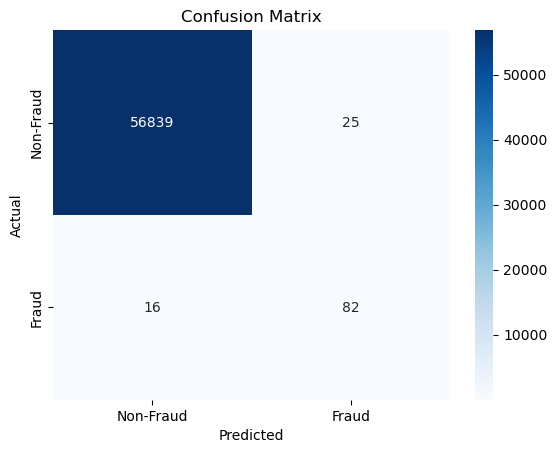

In [15]:
#2Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [3]:
#Step 16: Model Validation
#1Cross-Validation
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\CreditCardFault\\creditcard.csv")

# Feature-target split
X = df.drop('Class', axis=1)
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Define model and hyperparameter grid
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2, 5]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_sm, y_train_sm)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
print("Classification Report (after Hyperparameter Tuning):\n", classification_report(y_test, y_pred_best))

# Perform Stratified K-Fold Cross-Validation on full dataset
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_scores = cross_val_score(best_rf, X, y, cv=skf, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Classification Report (after Hyperparameter Tuning):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Cross-Validation Scores: [0.99945578 0.99959622 0.99961377 0.99954355 0.99950844]
Mean Cross-Validation Score: 0.9995435506680023


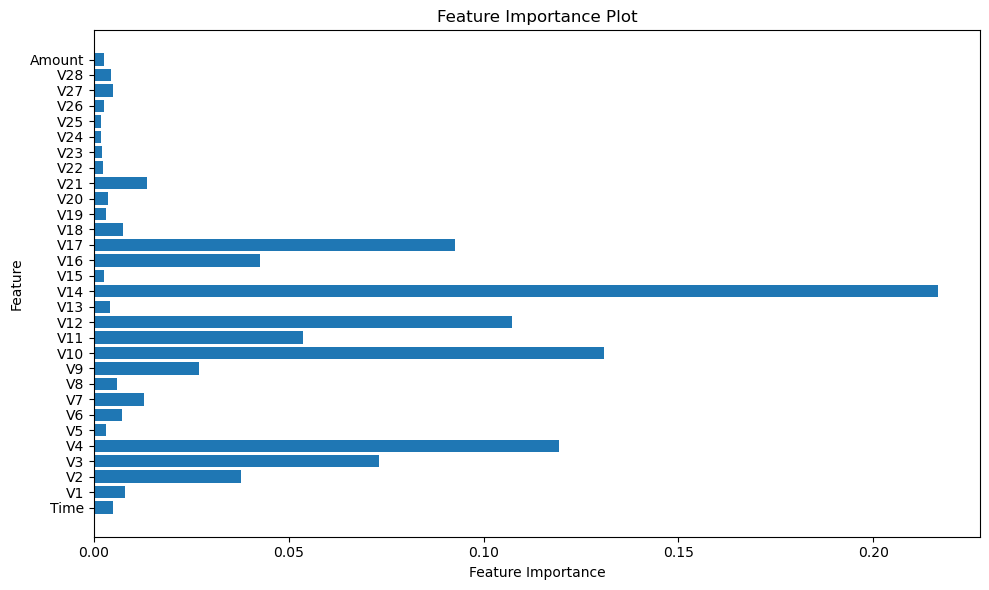

In [9]:
#Model Interpretation and Feature Importance
#1Feature Importance
# Feature Importance for Random Forest
import matplotlib.pyplot as plt  # Add this import

# Feature Importance for Random Forest
feature_importance = best_rf.feature_importances_

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.tight_layout()
plt.show()

